공공데이터 포털에서 제공하고 있는 소상공인시장진흥공단 상가업소정보 데이터를 분석합니다. https://www.data.go.kr/dataset/15012005/fileData.do

!ls
%ls
윈도우 dir

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

In [72]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')

In [4]:
shop_2018 = pd.read_csv("C:/Users/dh/Desktop/shop_201806_01.csv", encoding='cp949')
shop_2018.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [6]:
shop_2018.shape

(476183, 39)

In [7]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [8]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
coffee['상호명'].unique().shape

(13472,)

In [10]:
coffee['상호명'].value_counts()

이디야커피              459
스타벅스               308
간단하지만특별한화피디Cafe    191
투썸플레이스             129
커피빈                125
                  ... 
커피홀구로에이스트윈타워점        1
마마스여의도점              1
에프씨서울팬카페             1
이디야커피부산장전서희점         1
카페지브린엠               1
Name: 상호명, Length: 13472, dtype: int64

## 투썸플레이스 상권분석하기

In [11]:
coffee[coffee['상호명'].str.contains('투썸플레이스')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1553,19940228,투썸플레이스충정로역,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1141010200100630001030846,삼창빌딩,서울특별시 서대문구 충정로 13,120837,3737.0,NaN,1,NaN,126.962600,37.560560
1935,20306529,투썸플레이스압구정51케이,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700106020000000001,NaN,서울특별시 강남구 압구정로30길 45,135893,6022.0,NaN,1,NaN,127.029386,37.524338
1946,20293800,투썸플레이스가산대성디폴리스점,가산대성디폴리스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1154510100104890007014247,대성디폴리스지식산업센터,서울특별시 금천구 서부샛길 606,153719,8504.0,D,3,NaN,126.876996,37.479945
2448,20578779,투썸플레이스코엑스메가박스점,코엑스메가박스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101590000017116,코엑스인터콘티넨탈서울,서울특별시 강남구 영동대로 513,135798,6164.0,NaN,1,NaN,127.057100,37.512939
12261,19977178,투썸플레이스,예금보험공사점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114010200100330000018832,예금보험공사,서울특별시 중구 청계천로 30,100180,4521.0,NaN,1,NaN,126.980783,37.568495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471053,16114499,투썸플레이스,강서구청점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1150010300110950000000001,그랜드아이파크,서울특별시 강서구 화곡로 347,157927,7649.0,NaN,NaN,NaN,126.851279,37.554826
473421,16106212,투썸플레이스,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171011200100040009015081,애니카랜드,서울특별시 송파구 위례성대로 198,138855,5654.0,NaN,NaN,NaN,127.132817,37.509303
473982,16107358,투썸플레이스,마포공덕점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144010200102370006000001,공덕푸르지오시티,서울특별시 마포구 마포대로 156,121862,4211.0,NaN,NaN,NaN,126.954289,37.547845
474036,16142287,투썸플레이스,역삼테헤란로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100107360000000001,성홍타워,서울특별시 강남구 테헤란로 138,135924,6236.0,NaN,10,NaN,127.034287,37.499636


In [12]:
coffee.loc[coffee['상호명'].str.contains('투썸플레이스'), '상호명'].unique()

array(['투썸플레이스충정로역', '투썸플레이스압구정51케이', '투썸플레이스가산대성디폴리스점', '투썸플레이스코엑스메가박스점',
       '투썸플레이스', '투썸플레이스부산역점', '투썸플레이스종로구청점', '투썸플레이스대학로씨지브이',
       '투썸플레이스등촌로점', '투썸플레이스서면일번가점', '투썸플레이스커피', '어투썸플레이스', '투썸플레이스양재역점',
       'CJ투썸플레이스', '투썸플레이스금호하이리버점', '투썸플레이스명동역점', '투썸플레이스쌍문역',
       '투썸플레이스석촌호수점', '투썸플레이스동아대', '투썸플레이스앤드콜드스톤크리머리', '투썸플레이스서울대역중앙점',
       '투썸플레이스아크로비스타점', '투썸플레이스올리브영본점', '투썸플레이스센텀시티씨지브이',
       '투썸플레이스부산온천천점부산온천천점', '투썸플레이스선릉ING점', '투썸플레이스뱅뱅사거리점',
       '투썸플레이스상암씨지브이', '투썸플레이스부산문현금융단지', '투썸플레이스판교SK', '투썸플레이스가든파이브점',
       '투썸플레이스커피경희대점', '상티비투썸플레이스가산대', '투썸플레이스서대문KT&G타', '투썸플레이스콜드스톤크리머리',
       '투썸플레이스옥수리버젠점', '투썸플레이스상암E&M점', 'CJ푸드빌투썸플레이스퀘', '투썸플레이스황학신당역점',
       '투썸플레이스개화산역점', '투썸플레이스가산디지털점', '투썸플레이스종각역점', '투썸플레이스상계점',
       '탁앤초이투썸플레이스청담역지점', '투썸플레이스차병원사거리', '투썸플레이스중계은행사거리점',
       '투썸플레이스창동이마트점', '투썸플레이스강남신사점', '투썸플레이스,콜드스톤크리머리반포래미안퍼스티지점',
       '투썸플레이스동서울터미널', '투썸플레이스쌍문역점', '투썸플레이스송파CGV점', '투썸플레이스광장힐스테이스점',
       '투썸플레이스잠실역점', '투썸플레이스남산트라팰리스점', '투썸플레이스우장산역점', 

In [13]:
coffee['시도명'].isnull().sum()

0

In [14]:
coffee['시도명'].unique()

array(['부산광역시', '서울특별시'], dtype=object)

In [15]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
coffee['시도명'].value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

In [16]:
coffee['시군구명'].unique()

array(['연제구', '강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '종로구', '도봉구',
       '마포구', '광진구', '기장군', '남구', '서대문구', '은평구', '양천구', '해운대구', '관악구',
       '성동구', '송파구', '금천구', '사상구', '동대문구', '강서구', '금정구', '동작구', '중랑구',
       '강동구', '사하구', '북구', '용산구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [ ]:
coffee['상권업종중분류명'].value_counts()

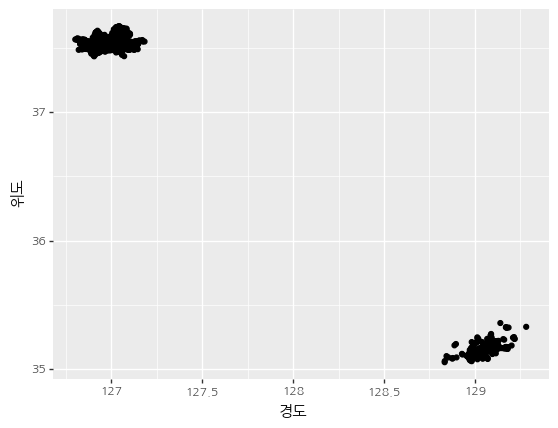

<ggplot: (74103580224)>

In [19]:
 (ggplot(shop_2018[:1000])
  + aes(x='경도', y='위도')
  + geom_point()
  + theme(text=element_text(family='NanumGothic'))
 )

## 서울의 투썸플레이스

In [21]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

In [26]:
df_seoul[df_seoul['상호명'].str.contains('투썸플레이스|Twosome Place|투썸|twosome|Twosome|TWOSOME')].shape

(225, 39)

In [34]:
df_seoul[df_seoul['상호명'].str.contains('투썸플레이스|Twosome Place|투썸|twosome|Twosome|TWOSOME')].copy()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1553,19940228,투썸플레이스충정로역,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1141010200100630001030846,삼창빌딩,서울특별시 서대문구 충정로 13,120837,3737.0,NaN,1,NaN,126.962600,37.560560
1935,20306529,투썸플레이스압구정51케이,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700106020000000001,NaN,서울특별시 강남구 압구정로30길 45,135893,6022.0,NaN,1,NaN,127.029386,37.524338
1946,20293800,투썸플레이스가산대성디폴리스점,가산대성디폴리스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1154510100104890007014247,대성디폴리스지식산업센터,서울특별시 금천구 서부샛길 606,153719,8504.0,D,3,NaN,126.876996,37.479945
2448,20578779,투썸플레이스코엑스메가박스점,코엑스메가박스점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010500101590000017116,코엑스인터콘티넨탈서울,서울특별시 강남구 영동대로 513,135798,6164.0,NaN,1,NaN,127.057100,37.512939
12261,19977178,투썸플레이스,예금보험공사점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114010200100330000018832,예금보험공사,서울특별시 중구 청계천로 30,100180,4521.0,NaN,1,NaN,126.980783,37.568495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471053,16114499,투썸플레이스,강서구청점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1150010300110950000000001,그랜드아이파크,서울특별시 강서구 화곡로 347,157927,7649.0,NaN,NaN,NaN,126.851279,37.554826
473421,16106212,투썸플레이스,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1171011200100040009015081,애니카랜드,서울특별시 송파구 위례성대로 198,138855,5654.0,NaN,NaN,NaN,127.132817,37.509303
473982,16107358,투썸플레이스,마포공덕점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144010200102370006000001,공덕푸르지오시티,서울특별시 마포구 마포대로 156,121862,4211.0,NaN,NaN,NaN,126.954289,37.547845
474036,16142287,투썸플레이스,역삼테헤란로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100107360000000001,성홍타워,서울특별시 강남구 테헤란로 138,135924,6236.0,NaN,10,NaN,127.034287,37.499636


In [35]:
df_Twosome = df_seoul[df_seoul['상호명'].str.contains('투썸플레이스|Twosome Place|투썸|twosome|Twosome|TWOSOME')].copy()

In [37]:
df_Twosome.shape

(225, 39)

In [38]:
df_Twosome['상호명'].value_counts()

투썸플레이스              100
투썸커피                  2
어투썸플레이스               2
투썸커피고려대법학관            2
투썸플레이스옥수리버젠점          2
                   ... 
투썸플레이스국립중앙박물관1호점      1
투썸플레이스발산역점            1
투썸플레이스용산트윈시티점         1
투썸플러스씨지브이영등포          1
투썸플레이스개화산역점           1
Name: 상호명, Length: 122, dtype: int64

In [ ]:
df_Twosome['브랜드명'] = ''

In [40]:
df_Twosome.loc[df_Twosome['상호명'].str.contains('투썸플레이스|Twosome Place|투썸|twosome|Twosome|TWOSOME'), '브랜드명'] = '투썸플레이스'

In [41]:
df_Twosome[['상호명', '브랜드명']].head()

,상호명,브랜드명
1553,투썸플레이스충정로역,투썸플레이스
1935,투썸플레이스압구정51케이,투썸플레이스
1946,투썸플레이스가산대성디폴리스점,투썸플레이스
2448,투썸플레이스코엑스메가박스점,투썸플레이스
12261,투썸플레이스,투썸플레이스


In [42]:
df_Twosome['위도'] = df_Twosome['위도'].astype(float)
df_Twosome['경도'] = df_Twosome['경도'].astype(float)

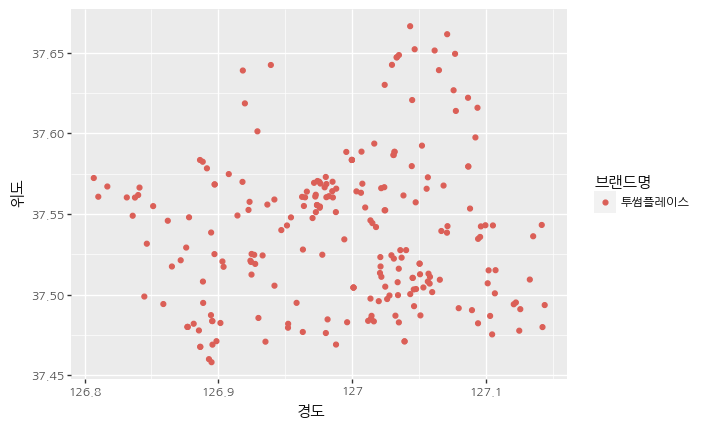

<ggplot: (74106215623)>

In [43]:
(ggplot(df_Twosome)
  + aes(x='경도', y='위도', color='브랜드명')
  + geom_point()
  + theme(text=element_text(family='NanumGothic'))
 )

In [51]:
geo_df = df_Twosome.copy()

In [54]:
geo_df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,브랜드명
1553,19940228,투썸플레이스충정로역,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,삼창빌딩,서울특별시 서대문구 충정로 13,120837,3737.0,NaN,1,NaN,126.9626,37.56056,투썸플레이스


In [73]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name =  geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '투썸플레이스' :
        icon_color = 'red'
    else:
        icon_color = 'blue'  
    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [95]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12,tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name =  geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '투썸플레이스' :
        icon_color = 'red'
    else:
        icon_color = 'blue'  
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 내가 자주 가는 투썸 플레이스 매장 지정하기

In [97]:
folium.Marker(  
    [37.542552, 126.951823],
    popup='<b> Twosome Place </b>',
).add_to(map)

map

## 구별 투썸플레이스 점포수

In [58]:
df_Twosome.groupby(['시군구명', '브랜드명'])['상호명'].count()

시군구명  브랜드명  
강남구   투썸플레이스    36
강동구   투썸플레이스     2
강북구   투썸플레이스     3
강서구   투썸플레이스    12
관악구   투썸플레이스     7
광진구   투썸플레이스     9
구로구   투썸플레이스     7
금천구   투썸플레이스    11
노원구   투썸플레이스     6
도봉구   투썸플레이스     5
동대문구  투썸플레이스     5
동작구   투썸플레이스     3
마포구   투썸플레이스    11
서대문구  투썸플레이스     7
서초구   투썸플레이스    17
성동구   투썸플레이스     8
성북구   투썸플레이스     6
송파구   투썸플레이스    11
양천구   투썸플레이스     3
영등포구  투썸플레이스    11
용산구   투썸플레이스     6
은평구   투썸플레이스     4
종로구   투썸플레이스    10
중구    투썸플레이스    20
중랑구   투썸플레이스     5
Name: 상호명, dtype: int64

In [60]:
pd.DataFrame(
    df_Twosome.groupby(['시군구명', '브랜드명'])['상호명'].count()
)

,,상호명
시군구명,브랜드명,
강남구,투썸플레이스,36
강동구,투썸플레이스,2
강북구,투썸플레이스,3
강서구,투썸플레이스,12
관악구,투썸플레이스,7
광진구,투썸플레이스,9
구로구,투썸플레이스,7
금천구,투썸플레이스,11
노원구,투썸플레이스,6


In [61]:
df_Twosome_brand = pd.DataFrame(
    df_Twosome.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_Twosome_brand.columns = ['구', '브랜드명', '매장수']
df_Twosome_brand

,구,브랜드명,매장수
0,강남구,투썸플레이스,36
1,강동구,투썸플레이스,2
2,강북구,투썸플레이스,3
3,강서구,투썸플레이스,12
4,관악구,투썸플레이스,7
5,광진구,투썸플레이스,9
6,구로구,투썸플레이스,7
7,금천구,투썸플레이스,11
8,노원구,투썸플레이스,6
9,도봉구,투썸플레이스,5


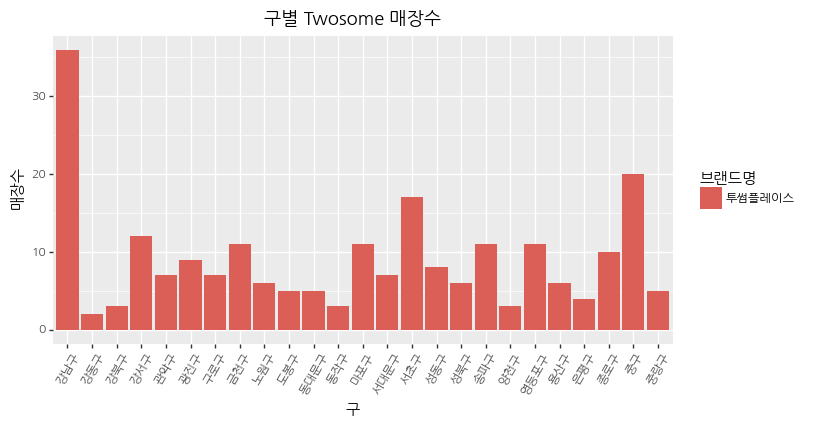

<ggplot: (74106314442)>

In [63]:
(ggplot(df_Twosome_brand)
 + aes(x='구', y='매장수', fill='브랜드명')
 + geom_bar(stat='identity', position='dodge') 
 + ggtitle('구별 Twosome 매장수')
 + theme(text=element_text(family='NanumGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)


강남구가 다른 구에 비해 훨씬 많은 투썸플레이스 매장을 가지고 있다.